In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/catimage/istockphoto-1067347086-612x612.jpg


In [2]:
pip install opencv-python

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import warnings
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
cv2.__version__

'4.5.4'

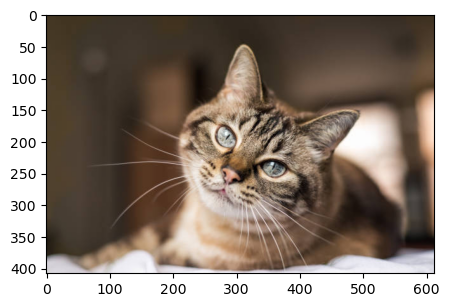

In [5]:
plt.figure(figsize = (5, 4)) 
imageData = plt.imread("../input/catimage/istockphoto-1067347086-612x612.jpg") #input or read an image
plt.imshow(imageData) #show the image
plt.grid(False) ##it will give us the image in same as main image
#plt.grid(True) #it will give us the image in a grid format
plt.show() #to remove this text (<function matplotlib.pyplot.show(close=None, block=None)>
            #) we use show()

In [6]:
imageData.shape #shape() gives image dimension in this way = heigth, width, number of channels(RGB)

(408, 612, 3)

In [7]:
print("shape(0) or first index or Height of the Image = ",imageData.shape[0])
print("shape(1) or second index or width of the Image = ",imageData.shape[1])
print("shape(2) or third index or num. of channels of the Image = ",imageData.shape[2])
imageSize = print("Image Size is = {}" .format(imageData.shape[0] * imageData.shape[1] * imageData.shape[2]))

shape(0) or first index or Height of the Image =  408
shape(1) or second index or width of the Image =  612
shape(2) or third index or num. of channels of the Image =  3
Image Size is = 749088


In [8]:
print("Image Shape: {}" .format(imageData.shape))
print("Image Size is : Image Height: {},  Image Width: {} and Image Channle: {} = {}".format(imageData.shape[0], imageData.shape[1], imageData.shape[2], imageData.size))

Image Shape: (408, 612, 3)
Image Size is : Image Height: 408,  Image Width: 612 and Image Channle: 3 = 749088


## We will do above things in a function to make the code more readable 

In [9]:
def catImageShow(imageTitle, image):
    imageVariable = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Here we will convert the image to RGB format by using cvtColor()
    plt.figure(figsize = (5, 4)) 
    plt.imshow(imageVariable)
    plt.title(imageTitle)
    plt.show()

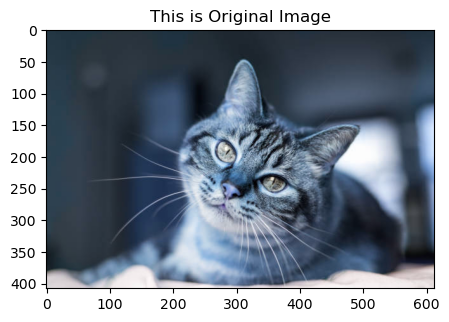

In [10]:
catImageShow("This is Original Image", imageData)

In [11]:
#if we want to get only height and width of an image then it shoulb be like this
imageData.shape[:2]

(408, 612)

# Image Masking

*Image masking is about hiding and revealing some parts of an image. Removing the background by using the masking service will keep the original image intact and enables you to adjust the mask later if necessary.*****

In [12]:
#mask Lider, Data Fusion
#The np.zeros() function creates a new NumPy array with the specified shape, filled with zeros.
#dtype = "uint8" sets the data type of the new imageMask array to unsigned 8-bit integers. This means that each element of the array can have a value between 0 and 255.
imageMask = np.zeros(imageData.shape[:2], dtype = "uint8") #image is initialized with all elements set to zero.

The imageMask array that results may be used as a binary mask to represent the areas of the image where we wish to perform picture processing operations such as edge detection or image segmentation. We may set select parts of the mask to 1 to indicate where we want the operation to be applied and leave the other elements at 0 to indicate where we want the picture to remain untouched.

In [13]:
imageMask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

The code generates a white rectangle on the binary image mask, with the top-left corner at (0, 450) and the bottom-right corner at (0, 450). (50, 250). The generated image mask will have a white rectangle in the specified place, with the remainder of the mask remaining black (with pixel values of 0). -1 parameter indicates that the rectangle should be filled in completely. without -1 the figure won't fill completely just border will be white color

In [14]:
#cv2.rectangle() is a function in the OpenCV library that draws a rectangle on an image.
cv2.rectangle(imageMask, (0, 450), (50, 250), 255, -1) #after masking an image we will draw a rectangle on the image

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

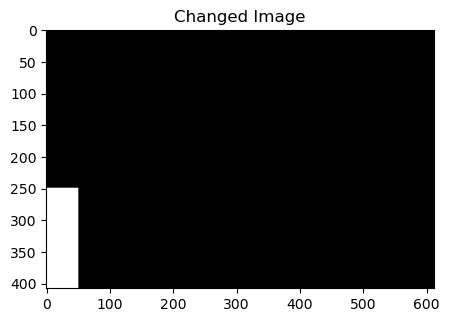

In [15]:
catImageShow("Changed Image", imageMask)

In [16]:
cv2.circle(imageMask, (100, 100), 50, 255, -1)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

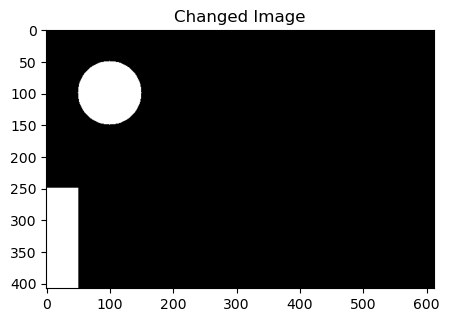

In [17]:
catImageShow("Changed Image", imageMask) #after masking an image we will draw a circle on the image

# Bit Masked Image

In image processing, bitwise operations such as bitwise AND, OR, XOR, and NOT are often used to perform pixel-wise logical operations on binary images or masks. These operations can be used to particularly modify or extract specific regions of an image based on their pixel values.(In short to pick a specific thing from an image we have to use these operations)

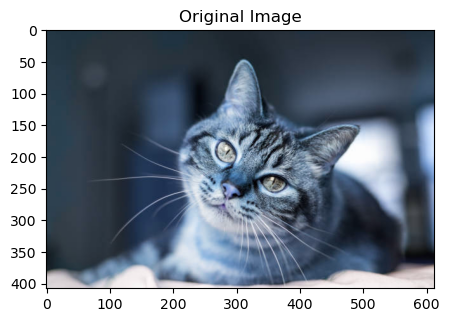

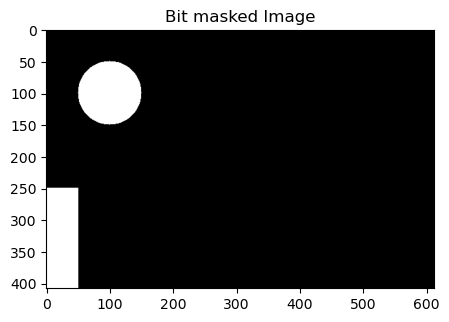

In [18]:
#We will use argumentImage for storing image and manipulate them.
#argmumentImage is a dictionary object that contains two key-value pairs.
#The purpose of the argmumentImage dictionary is to store the input parameters for the image processing operations.
#By storing the input parameters in a dictionary, it makes it easier to modify or update the input values in a single place rather than having to modify the input values throughout the code.

argumentImage = {"Image":"../input/catimage/istockphoto-1067347086-612x612.jpg", 
                 "scharr":0} #scharr needed for derivative gray image. We need this parameter when we implement edge detection.
imageData = plt.imread(argumentImage["Image"])
catImageShow("Original Image", imageData)
bitMask = cv2.bitwise_and(imageData, imageData, mask = imageMask) #can create a new mask that selects only the regions that are common to both masks.
catImageShow("Bit masked Image", imageMask)

Bitwise OR operation

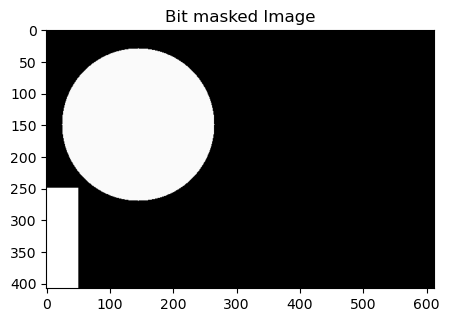

In [19]:
cv2.circle(imageMask, (145, 150), 120, 250, -1)
bitMask = cv2.bitwise_or(imageData, imageData, mask = imageMask)
catImageShow("Bit masked Image", imageMask)

# Resize Image

When we want to resize an image we need to do image scaling. And Scaling is done in two ways- Normalization , Standarization.
**Notes- we don't nees standard deviation for doing Normalization. But for Standarization we need standard deviation**

In [20]:
#imagedata[0][0] delivers the RGB color values of the pixel in the image's upper-left corner.
max(imageData[0][0])

67

In [21]:
min(imageData[0][0])

35

In [22]:
#Normalizing the pixel values by dividing by 255 scales
imageData/255

array([[[0.2627451 , 0.21176471, 0.1372549 ],
        [0.2627451 , 0.21176471, 0.1372549 ],
        [0.2627451 , 0.21176471, 0.1372549 ],
        ...,
        [0.23529412, 0.18431373, 0.12156863],
        [0.23529412, 0.18431373, 0.12156863],
        [0.23529412, 0.18431373, 0.12156863]],

       [[0.2627451 , 0.21176471, 0.1372549 ],
        [0.2627451 , 0.21176471, 0.1372549 ],
        [0.2627451 , 0.21176471, 0.1372549 ],
        ...,
        [0.23529412, 0.18431373, 0.12156863],
        [0.23529412, 0.18431373, 0.12156863],
        [0.23529412, 0.18431373, 0.12156863]],

       [[0.2627451 , 0.21176471, 0.1372549 ],
        [0.2627451 , 0.21176471, 0.1372549 ],
        [0.2627451 , 0.21176471, 0.1372549 ],
        ...,
        [0.23921569, 0.18823529, 0.1254902 ],
        [0.23921569, 0.18823529, 0.1254902 ],
        [0.23921569, 0.18823529, 0.1254902 ]],

       ...,

       [[0.84313725, 0.83529412, 0.84705882],
        [0.84705882, 0.83921569, 0.85098039],
        [0.84705882, 0

In [23]:
customValueHeight = 120.0/imageData.shape[0] #Here 120 is just a magic value.

In [24]:
customValueWidth = 120.0/imageData.shape[1]

In [25]:
customValueWidth

0.19607843137254902

In [26]:
customValueHeight

0.29411764705882354

In [27]:
imageDimension = (120, int(imageData.shape[0] * customValueWidth)) #original width * custom width

In [28]:
408*0.19607843137254902

80.0

In [29]:
print("Image Dimension = ",imageDimension)

Image Dimension =  (120, 80)


## Resize Image

Generally for resizing image we do interpolation

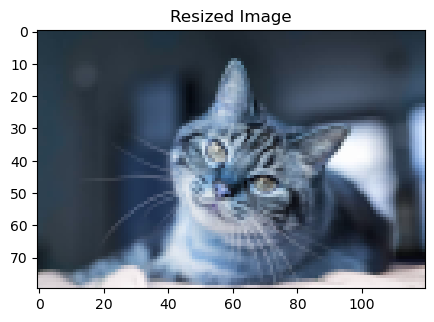

In [30]:
newImage = cv2.resize(imageData, imageDimension, interpolation = cv2.INTER_AREA)
catImageShow("Resized Image", newImage)

Here we have to distinguish the residue between previous image dimension and newImage dimension that's why we need to do interpolation. As we can see 80 is already have in 408 so we did it cv2.INTER_AREA

In [44]:
imageData.shape

(408, 612, 3)

In [31]:
newImage.shape

(80, 120, 3)

## Rotate Image

when we do image augmentation, we will need to do rotate an image. **Augmentation means we need to improve number of image quantity.**
So we need to divide them centrally

**unpack imageData**

In [32]:

(imageHeight, imageWidth) = imageData.shape[:2]

**dividing dimension centrally**

In [33]:

centerX , centerY = (imageHeight//2, imageWidth//2 )

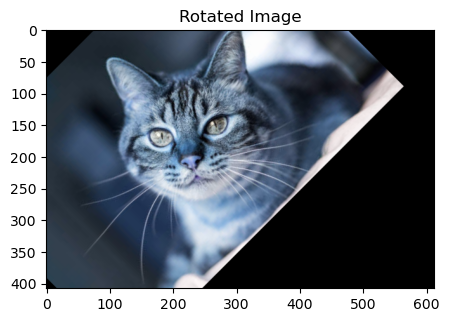

In [45]:
imageRotate = cv2.getRotationMatrix2D((centerX, centerY), 45, 1.0) #45 is angle, 1.0 is scale
rotateNow = cv2.cv2.warpAffine(imageData, imageRotate, (imageWidth, imageHeight)) #when rotate a image them height and width also will be rotating. That is why we write at first imageWidth and then imageHeight
catImageShow("Rotated Image", rotateNow)

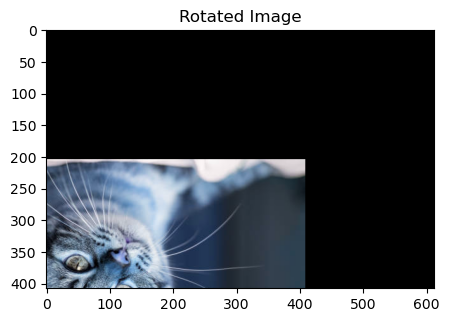

In [46]:
imageRotate = cv2.getRotationMatrix2D((centerX, centerY), 180, 1.0)
rotateNow = cv2.cv2.warpAffine(imageData, imageRotate, (imageWidth, imageHeight))
catImageShow("Rotated Image", rotateNow)

# Sobel Operation

We need Sobel for edge detection.

**Step 01: Convert Images to Gray**

In [36]:
grayImage = cv2.cvtColor(imageData, cv2.COLOR_RGB2GRAY) #converting RGB image to Gray image

In [37]:
grayImage.shape #notice now we just have 2 values as we convert RGB to Gray

(408, 612)

**Step:02- Implementing kernel for edge detection**

Here scharr > 0 then it will return -1 & if scharr < 0 then derivative of x will return 1,2,3, or something random value
**Note - if we work on derivative of x then all the change will be held on x.
        if we work on derivative of y then all the change will be held on y.**

In [47]:
kernelGenerate = -1 if argumentImage["scharr"] > 0 else 3 #scharr or derivative image we set it 0 or 1

Edge Detection

In [50]:
#derivative means gradient. CV_32F means image will be in 32 floating point
gradientImageDataX = cv2.Sobel(grayImage, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = kernelGenerate)
gradientImageDataY = cv2.Sobel(grayImage, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = kernelGenerate)


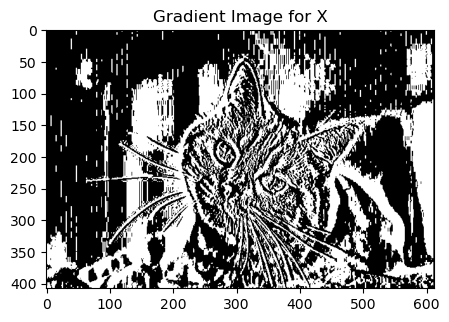

In [52]:
catImageShow("Gradient Image for X", gradientImageDataX)

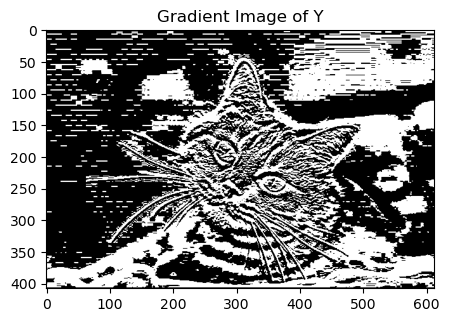

In [53]:
catImageShow("Gradient Image of Y", gradientImageDataY)

In [42]:
gradientImageDataX

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   3.,   1., ...,  -9., -11.,   0.],
       [  0.,   4.,   2., ..., -12., -15.,   0.],
       [  0.,   4.,   2., ..., -14., -16.,   0.]], dtype=float32)

In [43]:
gradientImageDataY

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  4.,  4.,  4.],
       [ 0.,  0.,  0., ...,  4.,  4.,  4.],
       ...,
       [ 4.,  5.,  7., ..., 15., 11.,  8.],
       [ 4.,  4.,  4., ..., 20., 17., 16.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)